# Chaotic Systems

- **Created by Andrés Segura Tinoco**
- **Created on May 19, 2019**

## Intro

Chaos theory is a branch of mathematics focusing on the behavior of dynamical systems that are highly sensitive to initial conditions. "Chaos" is an interdisciplinary theory stating that within the apparent randomness of chaotic complex systems, there are underlying patterns, constant feedback loops, repetition, self-similarity, fractals, self-organization, and reliance on programming at the initial point known as sensitive dependence on initial conditions.
Source: <a href="https://en.wikipedia.org/wiki/Chaos_theory">Wikipedia</a>

In [1]:
# Load the Python libraries
import numpy as np

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt

In [3]:
# This function gets a random number from a uniform distribution between the two input values [min_value, max_value] inclusively
def get_random_number(min_value, max_value):
    range = max_value - min_value
    num = np.random.uniform(0, 1)
    return min_value + range * num;

In [4]:
# Function that creates a series of numbers using chaos theory
def get_chaos_list(seed, n):
    numList = []
    lamda = 3.9976543219876543210
    x = seed;
    
    for i in range(n):
        x = x * lamda * (1 - x);
        numList += [x]
    
    return np.arange(len(numList)), numList;

In [5]:
# Function that plot a (x, y) series of points
def plot_line_chart(x, y, x_label, y_label, title):
    plt.figure(figsize = (16, 3))
    plt.plot(x, y, label = y_label)
    plt.xlabel(x_label, fontsize = 11)
    plt.ylabel(y_label, fontsize = 11)
    plt.title(title)
    plt.legend(loc = 'upper right')
    plt.show()

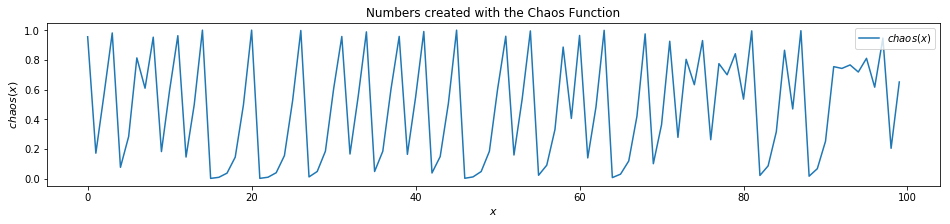

In [6]:
# Create and plot 100 random-chaos numbers
seed = get_random_number(0, 1)
x, y = get_chaos_list(seed, 100)
plot_line_chart(x, y, '$x$', '$chaos(x)$', 'Numbers created with the Chaos Function')

In [7]:
# Create 3 different seeds
seeds = []
for i in range(3):
    seeds += [get_random_number(0, 1)]
seeds

[0.554036795963795, 0.16869687103792086, 0.5300623506530913]

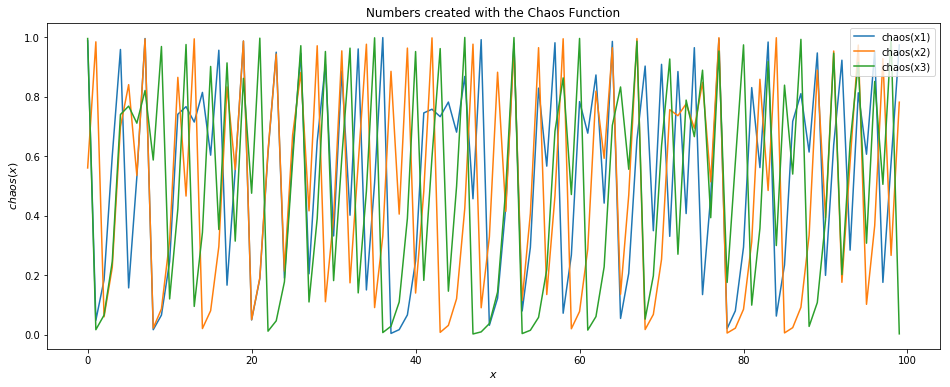

In [8]:
# Get 3 different chaos results
x1, y1 = get_chaos_list(seeds[0], 100)
x2, y2 = get_chaos_list(seeds[1], 100)
x3, y3 = get_chaos_list(seeds[2], 100)

# Plot multi-lines chart
x_label = '$x$'
y_label = '$chaos(x)$'
title = 'Numbers created with the Chaos Function'
plt.figure(figsize = (16, 6))
plt.plot(x1, y1, label = 'chaos(x1)')
plt.plot(x2, y2, label = 'chaos(x2)')
plt.plot(x3, y3, label = 'chaos(x3)')
plt.xlabel(x_label, fontsize = 11)
plt.ylabel(y_label, fontsize = 11)
plt.title(title)
plt.legend(loc = 'upper right')
plt.show()

<hr>
<p><a href="https://ansegura7.github.io/Algorithms/">« Home</a></p>